# Environment setting

In [2]:
# move to source directory
%pwd
%cd ../
%pwd
%ls

/home/yh/git/kaggle_ieee-fraud-detection
LICENSE*    kaggle-submit-ieee.sh*   run_0008-magic-xgb.py*
Makefile*   log/                     src/
README.md*  model/                   startup-jupyter.sh*
config/     notebook/                util/
data/       run_0006-nroman-lgb.py*
feature/    run_0007-nroman-lgb.py*


In [3]:
# import major modules
import pandas as pd
import numpy as np
import sys
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
sys.stdout.flush()

In [6]:
from config.config_0007 import config
from util.easydict import EasyDict
c = EasyDict(config)
c.keys()

dict_keys(['runtime', 'transformer', 'model', 'trainer', 'log'])

# Read data

In [7]:
c.log

{'VERSION': '0007',
 'main_log_path': PosixPath('/home/yh/git/kaggle_ieee-fraud-detection/log/main_0007.log'),
 'train_log_path': PosixPath('/home/yh/git/kaggle_ieee-fraud-detection/log/train_0007.tsv'),
 'FILE_HANDLER_LEVEL': 10,
 'STREAM_HANDLER_LEVEL': 10,
 'SLACK_HANDLER_LEVEL': 20,
 'slackauth': {'HOST': 'slack.com',
  'URL': '/api/chat.postMessage',
  'CHANNEL': 'ieee-fraud-detection',
  'NO_SEND_MESSAGE': False,
  'TOKEN_PATH': PosixPath('/root/.slack_token')}}

In [15]:
log = pd.read_csv(c.log.train_log_path, delimiter='\t')
print(log.shape)
log.head()
log.tail()

(438, 4)


,fold,iteration,train_auc,val_auc
433,5,960,0.996500,0.936205
434,5,970,0.996616,0.936316
435,5,980,0.996745,0.936367
436,5,990,0.996860,0.936404
437,5,1000,0.996978,0.936471


Text(0, 0.5, 'auc')

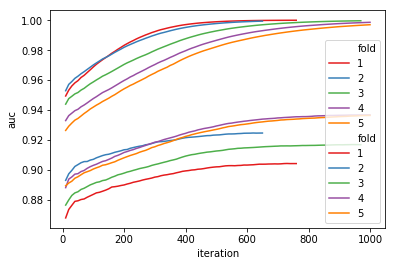

In [17]:
sns.lineplot(x="iteration", y="train_auc", data=log, palette=sns.color_palette("Set1", 5), hue='fold')
sns.lineplot(x="iteration", y="val_auc", data=log, palette=sns.color_palette("Set1", 5), hue='fold')
plt.ylabel('auc')